In [3]:
from IPython.core.pylabtools import figsize
figsize(12, 10)

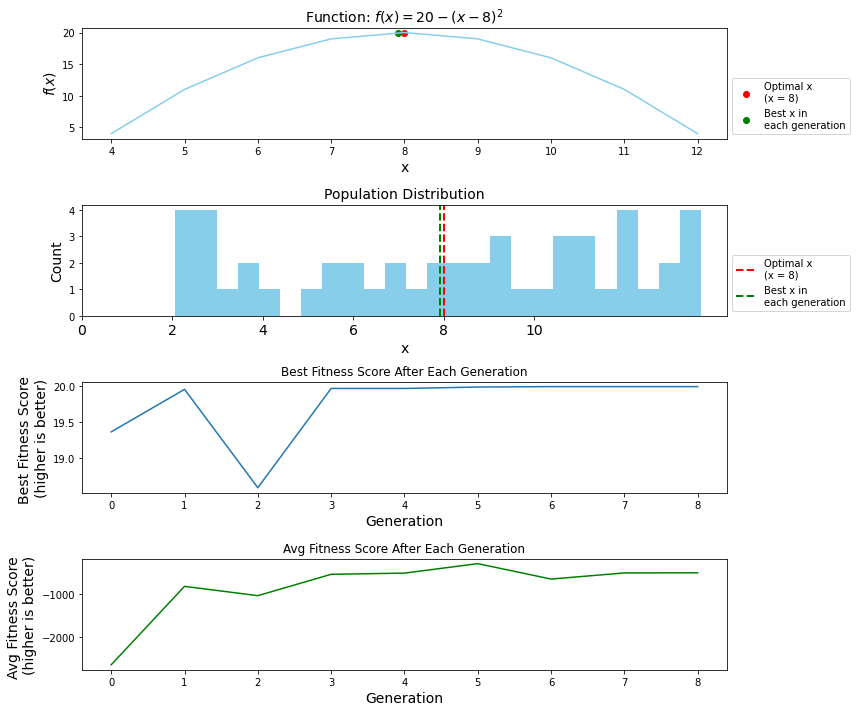

Best solution: x = 7.9179
Fitness: 19.9933
Actual value: 19.9933


In [9]:
import random
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# GA parameters
POPULATION_SIZE = 50
CHROMOSOME_LENGTH = 10  # 10-bit precision
GENERATIONS = 10
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8

# Convert binary string to decimal
def binary_to_decimal(binary):
    # Scale to [0, 100]
    return int(binary, 2) / (2**CHROMOSOME_LENGTH - 1) * 100 

# Fitness function
def fitness(chromosome):
    x = binary_to_decimal(chromosome)
    return 20 - (x - 8)**2

# Initialize population
population = [''.join(random.choice('01') for _ in range(CHROMOSOME_LENGTH)) 
              for _ in range(POPULATION_SIZE)]



x_plot = [i for i in range(4, 13)]
y_plot = [20 - (x - 8)**2 for x in x_plot]

plt.figure()
plt.subplot(4, 1, 1)
plt.plot(x_plot, y_plot, color='skyblue', label='$f(x) = 20 - (x - 8)^2$')  # Static plot of the function
plt.scatter(x=8, y=20, color='red', label='Optimal x\n(x = 8)')  # Static optimal point
plt.title('Function: $f(x) = 20 - (x - 8)^2$', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

best_fitnesses = []
avg_fitnesses = []
generation_numbers = []


for generation in range(GENERATIONS):

    population_decimal = [binary_to_decimal(x) for x in population]
    
    # Clear the previous plot
    clear_output(wait=True)
    plt.clf()

    # Plot function
    plt.subplot(4, 1, 1)
    plt.scatter(x=8, y=20, color='red', label='Optimal x\n(x = 8)')
    plt.scatter(x=population_decimal[0], y=20-(population_decimal[0] - 8)**2,color='green', label='Best x in\neach generation')
    
    plt.plot(x_plot, y_plot, color='skyblue')
    plt.xlabel('x', fontsize=14)
    plt.title('Function: $f(x) = 20 - (x - 8)^2$', fontsize=14)

    plt.ylabel('$f(x)$', fontsize=14)

    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

    # Plot population distribution
    plt.subplot(4, 1, 2)
    plt.hist(population_decimal, bins=int(POPULATION_SIZE/2), color='skyblue')
    plt.axvline(x=8, color='red', linestyle='--', linewidth=2,label='Optimal x\n(x = 8)')
    plt.axvline(x=population_decimal[0], color='green', linestyle='--', linewidth=2,label='Best x in\neach generation')
    plt.title('Population Distribution', fontsize=14)
    plt.xlabel('x', fontsize=14)
    plt.xticks(range(0,2*int(max(population_decimal)/2), 2), fontsize=14)
    plt.ylabel('Count', fontsize=14)

    plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
    
    # Plot best fitness evolution
    plt.subplot(4, 1, 3)
    plt.plot(generation_numbers, best_fitnesses, label='Best\nFitness')
    plt.title(r'Best Fitness Score After Each Generation')
    plt.xlabel('Generation', fontsize=14)
    plt.ylabel('Best Fitness Score \n(higher is better)', fontsize=14)

    # Plot avg fitness evolution
    plt.subplot(4, 1, 4)
    plt.plot(generation_numbers, avg_fitnesses, color='green')
    plt.title(r'Avg Fitness Score After Each Generation')
    plt.xlabel('Generation', fontsize=14)
    plt.ylabel('Avg Fitness Score \n(higher is better)', fontsize=14)


    plt.tight_layout()
    plt.draw()
    if generation == 0:
        plt.pause(5)
    else:
        plt.pause(0.01)  # Pause to allow the plot to update
    
    parents = population
    # Create new generation
    new_population = []
    for i in range(1, len(parents)):
        
        parent1, parent2 = parents[i-1], parents[i]
        
        # Crossover
        if random.random() < CROSSOVER_RATE:
            # Choose random single crossover point in the binary string
            crossover_point = random.randint(1, CHROMOSOME_LENGTH - 1)

            # Interchange the genes
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]
        else:
            child1, child2 = parent1, parent2
        
        # Mutation
        child1 = ''.join(b if random.random() > MUTATION_RATE else str(1-int(b)) for b in child1)
        child2 = ''.join(b if random.random() > MUTATION_RATE else str(1-int(b)) for b in child2)
        
        new_population.extend([child1, child2])

    # Evaluate fitness
    fitness_scores = {chrom: fitness(chrom) for chrom in new_population}
    # Sort fitness score descending for the selection late
    fitness_scores = {k: v for k, v in sorted(fitness_scores.items(), key=lambda item: item[1], reverse=True)}

    best_fitness = max(fitness_scores.values())
    avg_fitness = sum(fitness_scores.values())/len(fitness_scores.values())
    best_fitnesses.append(best_fitness)
    avg_fitnesses.append(avg_fitness)
    generation_numbers.append(generation)
    # Select only the top individuals with top fitness score, the rest will be eliminated
    # Rank-based selection
    population = list(fitness_scores.keys())[:POPULATION_SIZE]

# Find best solution
best_chromosome = max(population, key=fitness)
best_x = binary_to_decimal(best_chromosome)
print(f"Best solution: x = {best_x:.4f}")
print(f"Fitness: {fitness(best_chromosome):.4f}")
print(f"Actual value: {20-(best_x - 8)**2:.4f}")